### Paris Saint-Germain : PSG Qatar version 
### **Yassine Ghouzam, PhD**
#### 21/08/2017

* **1 Introduction**
* **2 Load and check data**
* **3 Bet smartly**
* **4 PSG Qatar version**    

## 1. Introduction

This kernel is a data exploration analysis of european soccer games from 2008 to 2016. I focused on the PSG football club with some statistics displayed about the Qatari period.

## 2. Load and check data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import sqlite3
from sklearn.metrics import accuracy_score

import warnings

warnings.filterwarnings('ignore')

sns.set(style='whitegrid', context='notebook', palette='deep')

np.random.seed(2)

In [2]:
con = sqlite3.connect("I:/yassine/Documents/MOOC/test/FIFA_data/database.sqlite")

matches = pd.read_sql_query("SELECT * FROM Match;",con)
teams = pd.read_sql_query("SELECT * FROM Team;",con)
#leagues = pd.read_sql_query("SELECT * FROM League;",con)
countries = pd.read_sql_query("SELECT * FROM Country;",con)

In [3]:
matches.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


Our matches dataset is composed of 115 columns and 25979 games. 
Firlty ill drop all the columns i don't need.

In [4]:
matches = matches.drop(labels = ['home_player_X1','home_player_X2','home_player_X3',
                       'home_player_X4','home_player_X5','home_player_X6',
                       'home_player_X7','home_player_X8','home_player_X9',
                       'home_player_X10','home_player_X11',
                       'home_player_Y1','home_player_Y2','home_player_Y3',
                       'home_player_Y4','home_player_Y5','home_player_Y6',
                       'home_player_Y7','home_player_Y8','home_player_Y9',
                       'home_player_Y10','home_player_Y11','home_player_1',
                       'home_player_2','home_player_3','home_player_4',
                       'home_player_5','home_player_6','home_player_7',
                       'home_player_8','home_player_9','home_player_10',
                       'home_player_11','away_player_X1','away_player_X2',
                       'away_player_X3','away_player_X4',
                       'away_player_X5','away_player_X6','away_player_X7',
                       'away_player_X8','away_player_X9','away_player_X10',
                       'away_player_X11','away_player_Y2','away_player_Y3',
                       'away_player_Y4','away_player_Y5','away_player_Y6',
                       'away_player_Y7','away_player_Y1',
                       'away_player_Y8','away_player_Y9','away_player_Y10',
                       'away_player_Y11','away_player_1',
                       'away_player_2','away_player_3','away_player_4',
                       'away_player_5','away_player_6','away_player_7',
                       'away_player_8','away_player_9','away_player_10',
                       'away_player_11'],axis = 1)

matches = matches.drop(labels = ['goal','shoton','shotoff','foulcommit','card',
                                 'cross','corner','possession'],axis = 1)



In [5]:
matches.isnull().sum()

id                      0
country_id              0
league_id               0
season                  0
stage                   0
date                    0
match_api_id            0
home_team_api_id        0
away_team_api_id        0
home_team_goal          0
away_team_goal          0
B365H                3387
B365D                3387
B365A                3387
BWH                  3404
BWD                  3404
BWA                  3404
IWH                  3459
IWD                  3459
IWA                  3459
LBH                  3423
LBD                  3423
LBA                  3423
PSH                 14811
PSD                 14811
PSA                 14811
WHH                  3408
WHD                  3408
WHA                  3408
SJH                  8882
SJD                  8882
SJA                  8882
VCH                  3411
VCD                  3411
VCA                  3411
GBH                 11817
GBD                 11817
GBA                 11817
BSH         

Features from B365H to BSA are bet odds from different betting sites. XXH are bet odd for home team win, XXD are for draw game bet odd and XXA are bet odd for away team win.

Ill drop bet features with too much NAs (>3500)

In [6]:
matches = matches.drop(labels = ['GBH','GBD','GBA','BSH','BSD','BSA','SJH','SJD','SJA',
                       'PSH','PSD','PSA'],axis = 1)

Then i drop rows (games) with NAs.

In [34]:
matches = matches.dropna(axis = 0).reset_index(drop=True)

matches.shape

(22432, 35)

We have 22432 games is larger enough for robust statistics.

In [9]:
matches.isnull().sum()

id_x                0
season              0
stage               0
date                0
match_api_id        0
home_team_api_id    0
away_team_api_id    0
home_team_goal      0
away_team_goal      0
B365H               0
B365D               0
B365A               0
BWH                 0
BWD                 0
BWA                 0
IWH                 0
IWD                 0
IWA                 0
LBH                 0
LBD                 0
LBA                 0
WHH                 0
WHD                 0
WHA                 0
VCH                 0
VCD                 0
VCA                 0
league_country      0
dtype: int64

The dataset is ready, no missing value remains. 

## 3. Bet smartly

Before analysing the PSG stats, i wanted to clarify something.

With friends i used to debate about the most predictible league. 
French, Spain, German, English, Italian ? To anwser this question i'll compare the bet odds with the real results and look at the accuracy.

In [8]:
matches = matches.merge(countries,left_on="league_id",right_on="id")

matches = matches.drop(labels = ["id_y","league_id","country_id"],axis=1)

matches = matches.rename(columns={'name':'league_country'})

I merged the countries dataset with matches dataset in order to get leagues countries.

In [10]:
matches["result"] = (matches["home_team_goal"] - matches["away_team_goal"]).map(
         lambda s : 0 if s > 0 else 1 if s == 0 else 2 )

For practical reasons, i made a result feature with the game result (0 = home team victory, 1 = Draw, 2 = Away team victory)

For each Bet site B365, BW, IW, LB ... 3 odds are available. 

The minimum odd refers to the most probable victory according to the betting site, for example for PSG-OM if we have B365H = 1.8 , B365D = 3.2 and  B365A = 4.5, the team home win (here PSG) is the most proable result according to Bet365.

I took the minimum odd for each betting site (0 = predicted home team victory, 1 = predicted Draw, 2 = predicted Away team victory)

In [11]:
matches["B365"] = np.argmin(matches[["B365H","B365D","B365A"]].values,axis = 1)
matches["BW"] = np.argmin(matches[["BWH","BWD","BWA"]].values,axis = 1)
matches["IW"] = np.argmin(matches[["IWH","IWD","IWA"]].values,axis = 1)
matches["LB"] = np.argmin(matches[["LBH","LBD","LBA"]].values,axis = 1)
matches["WH"] = np.argmin(matches[["WHH","WHD","WHA"]].values,axis = 1)
matches["VC"] = np.argmin(matches[["VCH","VCD","VCA"]].values,axis = 1)

Let's see now what is the best betting site.

In [12]:
# The most accurate betting sites

accuracy_score(matches["result"],matches["B365"])

0.53307774607703284

In [13]:
accuracy_score(matches["result"],matches["BW"])

0.5314728958630528

In [14]:
accuracy_score(matches["result"],matches["IW"])

0.53120542082738942

In [15]:
accuracy_score(matches["result"],matches["LB"])

0.5314728958630528

In [16]:
accuracy_score(matches["result"],matches["WH"])

0.53138373751783163

In [17]:
accuracy_score(matches["result"],matches["VC"])

0.5329440085592011

They are very similar, bet365 is the most accurate so ill keep this one.

In [18]:
# Compute accuracy in each group in the groupby pandas objects
def acc_group(y_true_desc,y_pred_desc):
    def inner(group):
        return accuracy_score(group[y_true_desc],group[y_pred_desc])
    inner.__name__ = 'acc_group'
    return inner

I define this little function to compute the accuracy inside the groups.

In [19]:
matches.groupby("league_country").apply(acc_group("result","B365"))

league_seasons_accuracies = matches.groupby(("league_country","season")).apply(acc_group("result","B365"))

league_seasons_accuracies = league_seasons_accuracies.reset_index()
league_seasons_accuracies = league_seasons_accuracies.rename(columns={0:'accuracy'})

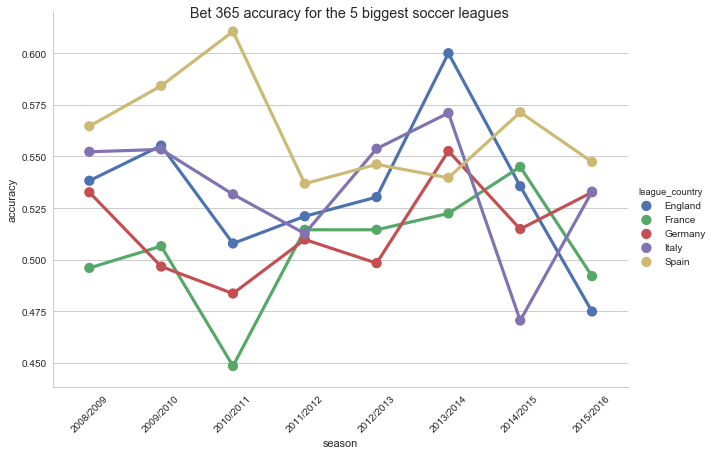

In [20]:
selected_countries = ["France","Spain","England","Germany","Italy"]

Five_leagues = league_seasons_accuracies[league_seasons_accuracies['league_country'].isin(selected_countries)]

g = sns.factorplot(x="season",y="accuracy",hue="league_country",data=Five_leagues,size=6,aspect=1.5)
g.set_xticklabels(rotation=45)
sns.plt.suptitle('Bet 365 accuracy for the 5 biggest soccer leagues')


So, the french league (Ligue 1) seems to be the less predictable, followed by the German league (Bundesliga).

The Spanish league (La Liga) is the most predictable. (I have tried with the other betting sites, the results are very close to this).

@yonilev has tried a different method to compute the 'predictability' (entropy of the bet odds) (https://www.kaggle.com/yonilev/the-most-predictable-league) but we both have similar results and conclusions.

So if you're a gambler bet on French league.
If you want the minimal risk bet on Spanish league.

## 4. PSG Qatar version

Now ill show you the difference between PSG before and after Qatar investment.

In [21]:
PSG_id = teams.loc[teams["team_short_name"] == 'PSG','team_api_id'].ravel()[0]

Find the PSG id.

In [22]:
PSG_games = matches.loc[((matches["home_team_api_id"] == PSG_id) | (matches["away_team_api_id"] == PSG_id))]

Then i select the PSG games.

In [23]:
PSG_games["date"] = pd.to_datetime(PSG_games["date"])
seasons = list(PSG_games["season"].unique())
PSG_games["season"] = pd.to_numeric(PSG_games["season"].map(lambda s: s.split("/")[0]))

In [24]:
PSG_goals = []
Opp_goals = []

for team_home, hg, ag in PSG_games[["home_team_api_id","home_team_goal","away_team_goal"]].values:
    if team_home == PSG_id:
        PSG_goals.append(hg)
        Opp_goals.append(ag)
    else :
        PSG_goals.append(ag)
        Opp_goals.append(hg)

PSG_games["PSG_goals"] = PSG_goals
PSG_games["Opp_goals"] = Opp_goals

I count the PSG goals and Opponent goals and add them to the dataset as features.

In [25]:
# 0 for win , 1 Draw and 2 for loss
PSG_games["PSG_result"] = (PSG_games["PSG_goals"] - PSG_games["Opp_goals"]).map(
         lambda s : 0 if s > 0 else 1 if s == 0 else 2)

Such as the 'result' feature, i create a 'PSG_result' feature which refers to the PSG match result (0 == Win, 1 == Draw, 2 == Loss).

In [26]:
PSG_games['Investor'] = PSG_games["season"].map(lambda s: 'Qatar' if s>=2011 else 'Other')

Qatari investors have been investing in the PSG since 2011. So i have created a new feature that report this information.

Let's see now the difference.

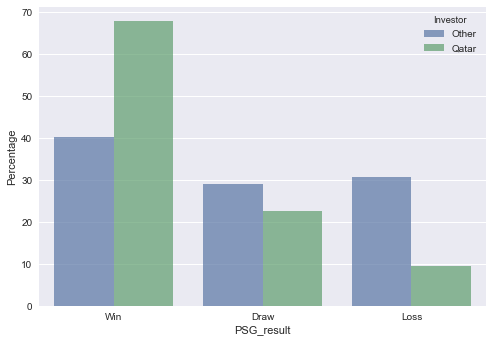

In [35]:
results_counts = (PSG_games.groupby(['Investor'])['PSG_result']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index())

sns.set_style("darkgrid")
p = sns.barplot(x="PSG_result", y="percentage", hue="Investor", data=results_counts,alpha=0.7)
p.set_ylabel("Percentage")
p = p.set_xticklabels(["Win","Draw","Loss"])

The Qatari investments make an important difference. PSG won almost 70% of their games since 2011 !!

Let's see now the game statistics.

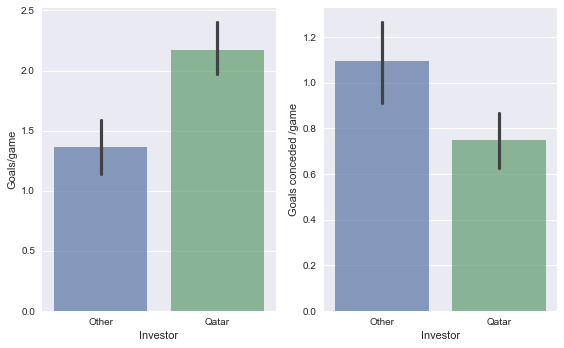

In [28]:
fig,axs = plt.subplots(1,2,figsize=(8,5))
g = sns.barplot(y="PSG_goals",x="Investor", data=PSG_games,ax=axs[0],alpha=0.7)
g.set_ylabel("Goals/game")
g = sns.barplot(y="Opp_goals",x="Investor", data=PSG_games,ax=axs[1],alpha=0.7)
g.set_ylabel("Goals conceded /game")
plt.tight_layout()
plt.show()
plt.gcf().clear()

Since Qatari investments , PSG scores more than 2 goals / games and concedes less than 1 goal/games ! Impressive !

Let's see the results in the long term with the records.

I wanted to compute the best  winning streak, undefeat streak ...

In [29]:
#Victory_series :
def get_best_streak(PSG_results,result_match):
    best_streak = 0
    max_streak = 0
    for i in PSG_results:
        if best_streak > max_streak:
            max_streak = best_streak
        
        if i in result_match:
            best_streak += 1
        else :
            best_streak = 0
    return max_streak

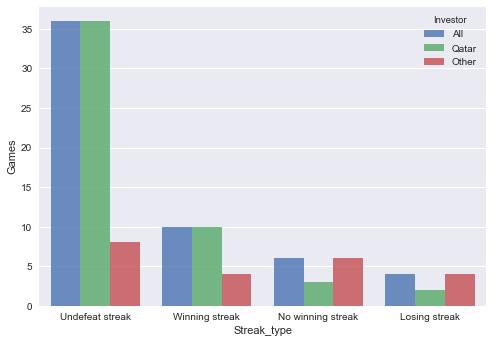

In [30]:
# 0 == Win , 1 == Draw, 2 == Loss
PSG_streaks = []
PSG_streaks.append(get_best_streak(PSG_games["PSG_result"],result_match=[0,1]))
PSG_streaks.append(get_best_streak(PSG_games["PSG_result"],result_match=[0]))
PSG_streaks.append(get_best_streak(PSG_games["PSG_result"],result_match=[2,1]))
PSG_streaks.append(get_best_streak(PSG_games["PSG_result"],result_match=[2]))

PSG_streaks.append(get_best_streak(PSG_games.loc[PSG_games["Investor"] == "Qatar","PSG_result"],result_match=[0,1]))
PSG_streaks.append(get_best_streak(PSG_games.loc[PSG_games["Investor"] == "Qatar","PSG_result"],result_match=[0]))
PSG_streaks.append(get_best_streak(PSG_games.loc[PSG_games["Investor"] == "Qatar","PSG_result"],result_match=[2,1]))
PSG_streaks.append(get_best_streak(PSG_games.loc[PSG_games["Investor"] == "Qatar","PSG_result"],result_match=[2]))

PSG_streaks.append(get_best_streak(PSG_games.loc[PSG_games["Investor"] != "Qatar","PSG_result"],result_match=[0,1]))
PSG_streaks.append(get_best_streak(PSG_games.loc[PSG_games["Investor"] != "Qatar","PSG_result"],result_match=[0]))
PSG_streaks.append(get_best_streak(PSG_games.loc[PSG_games["Investor"] != "Qatar","PSG_result"],result_match=[2,1]))
PSG_streaks.append(get_best_streak(PSG_games.loc[PSG_games["Investor"] != "Qatar","PSG_result"],result_match=[2]))

Investors = ["All"]*4
Investors.extend(["Qatar"]*4)
Investors.extend(["Other"]*4)
Streak_type = ["Undefeat_streak","Winning_streak","Nowin_streak","Loss_streak"]*3

PSG_streaks = pd.DataFrame({'Investor':Investors,'PSG_streak':PSG_streaks,'Streak_type':Streak_type})

g = sns.barplot(x="Streak_type",hue="Investor",y="PSG_streak",data=PSG_streaks,alpha=0.8,saturation=1)
g.set_ylabel("Games")
g = g.set_xticklabels(["Undefeat streak","Winning streak","No winning streak","Losing streak"])

- Longest winning run in Ligue 1: 10 matches . During the Qatari period.
- Longest unbeaten run in Ligue 1: 36 matches. During the Qatari period.
- Longest no winning run in Ligue 1: 6 matches. Outside the Qatari period.
- Longest losing run in Ligue 1: 4 matches. Outside the Qatari period.

PSG beats all their records in ligue 1, during the qatari pariod.

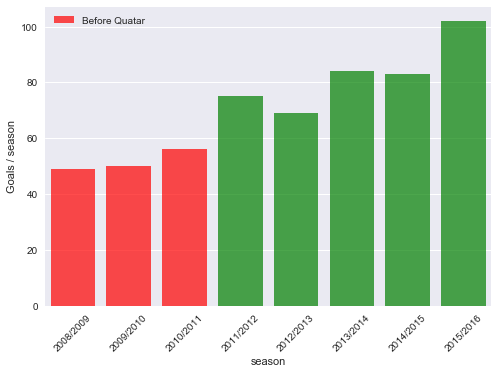

In [31]:
colors = ['r','r','r','g','g','g','g','g']
g = sns.barplot(y="PSG_goals",x="season", data=PSG_games,estimator=sum,palette=sns.color_palette(colors),
                label='Before Quatar',saturation=1,alpha=0.7,ci=0)
g.set_ylabel("Goals / season")
g.set_xticklabels(seasons,rotation = 45)
g.legend()

PSG scores a lot more goals per seasons since the Qatar investments.

- In the 2015/2016 season PSG has the french record (102 goals).

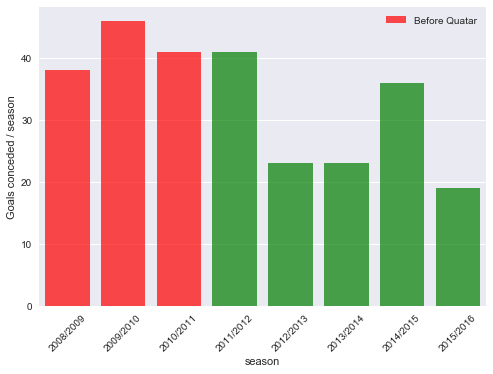

In [32]:
g = sns.barplot(y="Opp_goals",x="season", data=PSG_games,estimator=sum,palette=sns.color_palette(colors),
                label='Before Quatar',saturation=1,alpha=0.7,ci=0)
g.set_ylabel("Goals conceded / season")
g.set_xticklabels(seasons,rotation = 45)
g.legend()

PSG concedes much less goals per seasons since the Qatar investments.

- In the 2015/2016 season PSG has the french record (19 goals conceded).

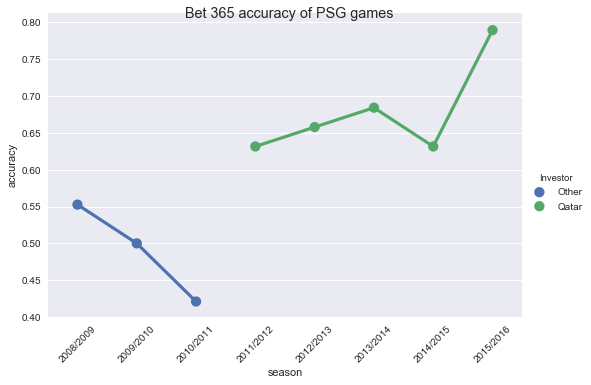

In [33]:
PSG_bets = PSG_games.groupby(("season","Investor")).apply(acc_group("result","B365"))

PSG_bets = PSG_bets.reset_index()
PSG_bets = PSG_bets.rename(columns={0:'accuracy'})

g = sns.factorplot(x='season',y="accuracy",hue="Investor",data=PSG_bets,size=5,aspect=1.5)
g.set_xticklabels(seasons,rotation = 45)
g = sns.plt.suptitle('Bet 365 accuracy of PSG games')

Since the qatari investments, it is better for you to bet on PSG. The team is much more reliable. Bet365 has 80% of accuracy during the season 2015/2016 !!. You could have make some money $$ :p.

It is now clear that the PSG became a very competitive team thanks to the qatar investment.